# EDA of the go_emotions dataset

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
emotions = load_dataset("go_emotions")

No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (/Users/alexanderjunge/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
emotions.set_format(type="pandas")

In [4]:
train_df = emotions["train"][:]
train_df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [5]:
f = emotions["train"].features["labels"]

In [6]:
f.feature.int2str

<bound method ClassLabel.int2str of ClassLabel(num_classes=28, names=['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'], id=None)>

In [7]:
def labels_int2str(row):
    return emotions["train"].features["labels"].feature.int2str(row)

In [8]:
train_df["label_names"] = train_df["labels"].apply(labels_int2str)
train_df.head()

,text,labels,id,label_names
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]


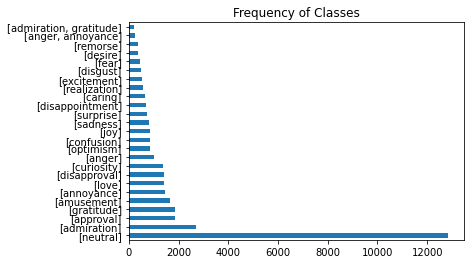

In [9]:
train_df["label_names"].value_counts(ascending=False)[:25].plot.barh()
plt.title("Frequency of Classes")
plt.show()